In [ ]:
# pip install google_play_scraper#done 


In [219]:
from sklearn.model_selection import train_test_split
# from translate import Translator
from app_store_scraper import AppStore
# from google_play_scraper import app
from google_play_scraper import Sort, reviews_all, app
import pandas as pd
import numpy as np
import json
import seaborn as sns
# from googletrans import Translator, constants
# from pprint import pprint
import pickle
import re
from langdetect import detect
from deep_translator import GoogleTranslator, PonsTranslator, LingueeTranslator



In [129]:
def detect_and_translate(text,target_lang):#target_lang
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                           "]+", flags=re.UNICODE)
    text=emoji_pattern.sub(r' ', text)
    result_lang = text.isascii()
    #print("text1=",text1,"result_lang=",result_lang,"text=",text,target_lang)
    if result_lang == True :
        return text 
    
    else :
#         translator = Translator()
#         translate_text = translator.translate(text,dest='en').text
        translate_text=GoogleTranslator(source='auto', target='en').translate(text=text)
            
        return translate_text 

In [3]:
GoogleTranslator(source='auto', target='en').translate(text="فهد fahad")

'fahad fahad'

In [ ]:

# trans = Translator()
# t = trans.translate(
#     'Bom dizzza para você', src= 'pt', dest='en'
# )
# print(f'Source: {t.src}')
# print(f'Destination: {t.dest}')
# print(f'{t.origin} -> {t.text}')
# print()

In [ ]:
# pip install git+https://github.com/BoseCorp/py-googletrans.git --upgrade


In [ ]:
# absher_app = AppStore(country="sa", app_name=""
# absher_app.reviews_count
# absher_app

In [88]:
TWK_app = AppStore(country="sa", app_name="Tawakkalna (Covid-19 KSA)")

TWK_app.review()

2021-10-03 19:29:50,664 [INFO] Base - Searching for app id
2021-10-03 19:29:56,294 [INFO] Base - Initialised: AppStore('sa', 'tawakkalna-covid-19-ksa-', 1506236754)
2021-10-03 19:29:56,298 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/sa/app/tawakkalna-covid-19-ksa-/id1506236754
2021-10-03 19:30:01,590 [INFO] Base - [id:1506236754] Fetched 180 reviews (180 fetched in total)
2021-10-03 19:30:07,530 [INFO] Base - [id:1506236754] Fetched 400 reviews (400 fetched in total)
2021-10-03 19:30:13,265 [INFO] Base - [id:1506236754] Fetched 620 reviews (620 fetched in total)
2021-10-03 19:30:19,306 [INFO] Base - [id:1506236754] Fetched 840 reviews (840 fetched in total)
2021-10-03 19:30:25,246 [INFO] Base - [id:1506236754] Fetched 1000 reviews (1000 fetched in total)
2021-10-03 19:30:31,082 [INFO] Base - [id:1506236754] Fetched 1180 reviews (1180 fetched in total)
2021-10-03 19:30:37,125 [INFO] Base - [id:1506236754] Fetched 1380 reviews (1380 fetched in total)
2021-10-03 19:3

In [89]:
TWK_app.reviews_count

3149

In [96]:
apple_df = pd.DataFrame(np.array(TWK_app.reviews),columns=['review'])

apple_df = apple_df.join(pd.DataFrame(apple_df.pop('review').tolist()))

apple_df.drop(columns=['developerResponse','isEdited'],inplace=True)

In [108]:
apple_df.columns

Index(['rating', 'title', 'date', 'review', 'userName'], dtype='object')

In [112]:
review_df=apple_df.drop(columns="title")
review_df

,rating,date,review,userName
0,4,2021-02-05 10:14:14,I suggest you to make the app work offline too...,r980831
1,1,2021-08-08 21:11:24,The app developers has no respect for the priv...,sweatytryhard989
2,5,2021-08-09 10:48:24,Pfizer has been set as default vaccination for...,Lei Davinci
3,4,2020-05-07 11:41:27,"Good application overall,,\nBut I would sugges...",hadkamal
4,5,2021-09-09 17:56:20,I think the app is great when I’m logged in. G...,ebuHuda
...,...,...,...,...
3144,1,2020-05-25 14:51:47,Application sometimes error,Hashim009
3145,1,2020-05-25 11:12:16,Such a poor application. I am trying to login ...,ahsan743
3146,5,2020-05-13 23:44:24,Not able to sign up.when trying shows it’s for...,ahadsatelite
3147,5,2021-03-25 02:56:07,وبارك الله في قيادتنا واعانهم و وفقهم وسدد خطا...,علي الوقيص


In [122]:
title_df=apple_df.drop(columns="review")
title_df

,rating,title,date,userName
0,4,Suggestion,2021-02-05 10:14:14,r980831
1,1,Location privacy and offline suppprt,2021-08-08 21:11:24,sweatytryhard989
2,5,Removal of Auto selection of Pfizer in approva...,2021-08-09 10:48:24,Lei Davinci
3,4,Good overall,2020-05-07 11:41:27,hadkamal
4,5,Login log off,2021-09-09 17:56:20,ebuHuda
...,...,...,...,...
3144,1,Application sometimes error,2020-05-25 14:51:47,Hashim009
3145,1,Ridiculous,2020-05-25 11:12:16,ahsan743
3146,5,Sign up issue,2020-05-13 23:44:24,ahadsatelite
3147,5,شكرا حكومتنا الغالية,2021-03-25 02:56:07,علي الوقيص


In [125]:
title_df.rename(columns={'title': 'review',}, inplace=True)
title_df

,rating,review,date,userName
0,4,Suggestion,2021-02-05 10:14:14,r980831
1,1,Location privacy and offline suppprt,2021-08-08 21:11:24,sweatytryhard989
2,5,Removal of Auto selection of Pfizer in approva...,2021-08-09 10:48:24,Lei Davinci
3,4,Good overall,2020-05-07 11:41:27,hadkamal
4,5,Login log off,2021-09-09 17:56:20,ebuHuda
...,...,...,...,...
3144,1,Application sometimes error,2020-05-25 14:51:47,Hashim009
3145,1,Ridiculous,2020-05-25 11:12:16,ahsan743
3146,5,Sign up issue,2020-05-13 23:44:24,ahadsatelite
3147,5,شكرا حكومتنا الغالية,2021-03-25 02:56:07,علي الوقيص


In [149]:
apple_df = pd.concat([title_df,review_df ], axis=0,ignore_index=True)
apple_df

,rating,review,date,userName
0,4,Suggestion,2021-02-05 10:14:14,r980831
1,1,Location privacy and offline suppprt,2021-08-08 21:11:24,sweatytryhard989
2,5,Removal of Auto selection of Pfizer in approva...,2021-08-09 10:48:24,Lei Davinci
3,4,Good overall,2020-05-07 11:41:27,hadkamal
4,5,Login log off,2021-09-09 17:56:20,ebuHuda
...,...,...,...,...
6293,1,Application sometimes error,2020-05-25 14:51:47,Hashim009
6294,1,Such a poor application. I am trying to login ...,2020-05-25 11:12:16,ahsan743
6295,5,Not able to sign up.when trying shows it’s for...,2020-05-13 23:44:24,ahadsatelite
6296,5,وبارك الله في قيادتنا واعانهم و وفقهم وسدد خطا...,2021-03-25 02:56:07,علي الوقيص


In [ ]:
# AA.to_csv("AA.csv",index=False)

In [ ]:
# apple_df.to_csv("apple_df.csv",index=False)

In [ ]:
# google_df.to_csv("google_df.csv",index=False)

In [ ]:
# listt=pd.DataFrame(listt)

In [ ]:
# listt.to_csv("listt.csv",index=False)

In [ ]:
# list_noten=pd.DataFrame(list_noten)
# list_noten.to_csv("list_noten.csv",index=False)

In [ ]:
# listt1=pd.DataFrame(listt1)
# listt1.to_csv("listt1.csv",index=False)

In [ ]:

# from langdetect import DetectorFactory
# DetectorFactory.seed = 0

In [ ]:
# text = u'This dog \U0001f602'
# print(text) # with emoji

# emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
# emoji_pattern.sub(r'', text) # no emoji

In [ ]:
emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                           "]+", flags=re.UNICODE)

In [147]:
def detect_and_translate(text,target_lang):#target_lang
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642" 
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                           "]+", flags=re.UNICODE)
    text=emoji_pattern.sub(r' ', text)
    result_lang = text.isascii()
    #print("text1=",text1,"result_lang=",result_lang,"text=",text,target_lang)
    if result_lang == True :
        return text 
    
    else :
#         translator = Translator()
#         translate_text = translator.translate(text,dest='en').text
        translate_text=GoogleTranslator(source='auto', target='en').translate(text=text)
            
        return translate_text 

In [ ]:
# "fahad".isascii()

In [130]:
# detect_and_translate("فهد Fahad 👎🏾",target_lang='en')

'Fahad Fahad'

In [ ]:
# text2=emoji_pattern.sub(r' ', "😤😤")
# text2

In [136]:
# AA = pd.read_csv("AA.csv")
# AA

In [156]:
apple_df=apple_df[apple_df['review']!='٠']
apple_df

,rating,review,date,userName
0,4,Suggestion,2021-02-05 10:14:14,r980831
1,1,Location privacy and offline suppprt,2021-08-08 21:11:24,sweatytryhard989
2,5,Removal of Auto selection of Pfizer in approva...,2021-08-09 10:48:24,Lei Davinci
3,4,Good overall,2020-05-07 11:41:27,hadkamal
4,5,Login log off,2021-09-09 17:56:20,ebuHuda
...,...,...,...,...
6293,1,Application sometimes error,2020-05-25 14:51:47,Hashim009
6294,1,Such a poor application. I am trying to login ...,2020-05-25 11:12:16,ahsan743
6295,5,Not able to sign up.when trying shows it’s for...,2020-05-13 23:44:24,ahadsatelite
6296,5,وبارك الله في قيادتنا واعانهم و وفقهم وسدد خطا...,2021-03-25 02:56:07,علي الوقيص


In [157]:
apple_df=apple_df[apple_df['review']!="."]
apple_df

,rating,review,date,userName
0,4,Suggestion,2021-02-05 10:14:14,r980831
1,1,Location privacy and offline suppprt,2021-08-08 21:11:24,sweatytryhard989
2,5,Removal of Auto selection of Pfizer in approva...,2021-08-09 10:48:24,Lei Davinci
3,4,Good overall,2020-05-07 11:41:27,hadkamal
4,5,Login log off,2021-09-09 17:56:20,ebuHuda
...,...,...,...,...
6293,1,Application sometimes error,2020-05-25 14:51:47,Hashim009
6294,1,Such a poor application. I am trying to login ...,2020-05-25 11:12:16,ahsan743
6295,5,Not able to sign up.when trying shows it’s for...,2020-05-13 23:44:24,ahadsatelite
6296,5,وبارك الله في قيادتنا واعانهم و وفقهم وسدد خطا...,2021-03-25 02:56:07,علي الوقيص


In [ ]:
# for i in AA.review:
#     print(i)

In [ ]:
# test=AA.sample(100)
# test

In [158]:
#Deconcatenation (i.e won't ==> will not)
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
apple_df.review = apple_df.review.apply(decontracted)

#Removing numbers
def rem_num(phrase):
  return re.sub("\S*\d\S*", "", phrase).strip().replace('  ', ' ')
apple_df.review = apple_df.review.apply(rem_num)

# #Removing spacial character
# def rem_char(phrase):
#   return re.sub('[^A-Za-z]+', ' ', phrase).strip().replace('  ', ' ')
# apple_df.review = apple_df.review.apply(rem_char)

# #Removing html tags
# def rem_html(phrase):
#   return re.sub('[^A-Za-z]+', ' ', phrase)
# apple_df.review =  apple_df.review.apply(rem_html)

apple_df

,rating,review,date,userName
0,4,Suggestion,2021-02-05 10:14:14,r980831
1,1,Location privacy and offline suppprt,2021-08-08 21:11:24,sweatytryhard989
2,5,Removal of Auto selection of Pfizer in approva...,2021-08-09 10:48:24,Lei Davinci
3,4,Good overall,2020-05-07 11:41:27,hadkamal
4,5,Login log off,2021-09-09 17:56:20,ebuHuda
...,...,...,...,...
6293,1,Application sometimes error,2020-05-25 14:51:47,Hashim009
6294,1,Such a poor application. I am trying to login ...,2020-05-25 11:12:16,ahsan743
6295,5,Not able to sign up.when trying shows it’s for...,2020-05-13 23:44:24,ahadsatelite
6296,5,وبارك الله في قيادتنا واعانهم و وفقهم وسدد خطا...,2021-03-25 02:56:07,علي الوقيص


In [166]:
apple_df

,rating,review,date,userName,review1
0,4,Suggestion,2021-02-05 10:14:14,r980831,Suggestion
1,1,Location privacy and offline suppprt,2021-08-08 21:11:24,sweatytryhard989,Location privacy and offline suppprt
2,5,Removal of Auto selection of Pfizer in approva...,2021-08-09 10:48:24,Lei Davinci,Removal of Auto selection of Pfizer in approva...
3,4,Good overall,2020-05-07 11:41:27,hadkamal,Good overall
4,5,Login log off,2021-09-09 17:56:20,ebuHuda,Login log off
...,...,...,...,...,...
6293,1,Application sometimes error,2020-05-25 14:51:47,Hashim009,Application sometimes error
6294,1,Such a poor application. I am trying to login ...,2020-05-25 11:12:16,ahsan743,Such a poor application. I am trying to login ...
6295,5,Not able to sign up.when trying shows it’s for...,2020-05-13 23:44:24,ahadsatelite,Not able to sign up.when trying shows it’s for...
6296,5,"And may God bless our leadership, help them, g...",2021-03-25 02:56:07,علي الوقيص,"And may God bless our leadership, help them, g..."


In [159]:
newcol=[]
for i in apple_df.review:
    newcol.append(detect_and_translate(i,target_lang='en'))
    

In [160]:
len(newcol)

6257

In [165]:
apple_df["review"]=newcol

In [168]:
# apple_df.drop(columns="review1",inplace=True)

In [172]:
apple_df.drop_duplicates(inplace=True)
print(apple_df.duplicated().sum())

# drop null rows
apple_df.dropna(inplace=True)

#Exclude empty reviews
apple_df = apple_df[apple_df.review != '']

0


In [174]:
#Deconcatenation (i.e won't ==> will not)
def decontracted(phrase):
    # specific
    
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
apple_df.review = apple_df.review.apply(decontracted)

#Removing numbers
def rem_num(phrase):
  return re.sub("\S*\d\S*", "", phrase).strip().replace('  ', ' ')
apple_df.review = apple_df.review.apply(rem_num)

# #Removing spacial character
def rem_char(phrase):
  return re.sub('[^A-Za-z]+', ' ', phrase).strip().replace('  ', ' ')
apple_df.review = apple_df.review.apply(rem_char)

# #Removing html tags
def rem_html(phrase):
  return re.sub('[^A-Za-z]+', ' ', phrase)
apple_df.review =  apple_df.review.apply(rem_html)

apple_df.review.head()

0                                           Suggestion
1                 Location privacy and offline suppprt
2    Removal of Auto selection of Pfizer in approva...
3                                         Good overall
4                                        Login log off
Name: review, dtype: object

In [175]:
apple_df

,rating,review,date,userName
0,4,Suggestion,2021-02-05 10:14:14,r980831
1,1,Location privacy and offline suppprt,2021-08-08 21:11:24,sweatytryhard989
2,5,Removal of Auto selection of Pfizer in approva...,2021-08-09 10:48:24,Lei Davinci
3,4,Good overall,2020-05-07 11:41:27,hadkamal
4,5,Login log off,2021-09-09 17:56:20,ebuHuda
...,...,...,...,...
6292,1,It keeps giving me an error which show i have ...,2020-05-30 20:10:36,omar.5472
6294,1,Such a poor application I am trying to login f...,2020-05-25 11:12:16,ahsan743
6295,5,Not able to sign up when trying shows it s for...,2020-05-13 23:44:24,ahadsatelite
6296,5,And may God bless our leadership help them gui...,2021-03-25 02:56:07,علي الوقيص


In [178]:
# def isarabic(x):
#     if(not x.isascii()):
#         return 1
#     else:
#         return 0
# aa['arabic'] = apple_df.review.apply(isarabic)

In [179]:
# aa.arabic.value_counts()

0    6097
Name: arabic, dtype: int64

In [ ]:
# AA.drop_duplicates(inplace=True)
# print(AA.duplicated().sum())

# aa = AA[AA.review != '']

In [ ]:
# #lets remove the duplicates
# AA.drop_duplicates(inplace=True)
# print(AA.duplicated().sum())

# # drop null rows
# data.dropna(inplace=True)

# #Exclude empty reviews
# data = data[data.Review != '']

In [180]:
#removing stop words
stopwords= set([
    'br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
    "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they',
    'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
    'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
    'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're',
    've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
    "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
    ])
def rem_stopwords(phrase):
  return ' '.join(e.lower() for e in phrase.split() if e.lower() not in stopwords)
apple_df.review = apple_df.review.apply(rem_stopwords)

C:\Users\Fahad-MSi\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [185]:
apple_df.to_csv('apple_df',index=False)

In [ ]:
# for i in AA.review:
#     if i.isdigit() == True:
#         print(i)
        

In [ ]:
# string='21321.212'

In [ ]:
# string.isdigit()

In [ ]:
# re.sub("\S*\d\S*", "", string)

In [ ]:
# listt=[]
# for i in AA.review:
#     try:
#         listt.append(detect_and_translate(i,target_lang='en'))
#     except :
#         pass
    

In [ ]:
# listt1=[]
# for i in listt:
#     listt1.append(detect_and_translate(i,target_lang='en'))

In [ ]:
# listt2=[]
# for i in list_noten:
#     listt2.append(detect_and_translate(i,target_lang='en'))

In [ ]:
# apple_df[apple_df['review']==("["
#         u"\U0001F600-\U0001F64F"  # emoticons
# #     u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#           # transport & map symbols
#           # flags (iOS)
#                            "]+")]


In [ ]:
# appa = apple_df.copy()
# # ilter(lambda c: c.isalpha(), s)
# filter_char = lambda c: ord(c) < 256
# appa['review'] = appa['review'].apply(lambda s: ''.join(filter(lambda c: c.isalpha(), s)))

In [ ]:
# appa.date.sort_values(ascending=True)

In [ ]:
# apple_df.iloc[667].reset_index()

In [ ]:
# for i in apple_df.review:
#     print(detect_and_translate(i,target_lang='en'))
    

In [ ]:
# print(detect_and_translate(sentence,target_lang='sw'))

In [ ]:
# list_noten

In [ ]:
# list_noten=pd.DataFrame

In [ ]:
# AA["review"][i]

In [ ]:
# # for ind in df.index:
# #      print(df['Name'][ind], df['Stream'][ind])
# # AA.review
# detect(AA["review"][i])
# AA["review"][i]

In [ ]:
# for i in AA.index:
#     print(i)

In [ ]:
c

In [ ]:
# AA.iloc[i].T
# (AA["review"][i])==(emoji_pattern)

In [ ]:
# list_noten=[]
# for i in AA.index:
# #     try:
#          c=detect(AA["review"][i])
#          if c != "en":
#             p=c
#             list_noten.append(AA["review"][i])
#         else:
# #     except:
# #         pass
# #       try:
           
            
# # #         text=emoji_pattern.sub(r'', text)
        
# # #         list_noten["new_not"]= AA.iloc[i]     
# #         except:
# #         pass
    


In [ ]:
# type(detect(i))

In [ ]:
# translations = translator.translate(apple_df['review'], dest="en")
# for translation in translations:
#     print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

In [ ]:
# apple_df["reviewT"] = apple_df.apply(lambda x:  x["review"] if x["review"] == "en" else 
#  translator.translate(apple_df['review'], dest='en') ,axis=1)

In [ ]:

# df1 = apple_df['review'].apply(trans.translate, dest='en').apply(getattr, args=('text',))
# print(df1)

<AxesSubplot:xlabel='rating', ylabel='Count'>

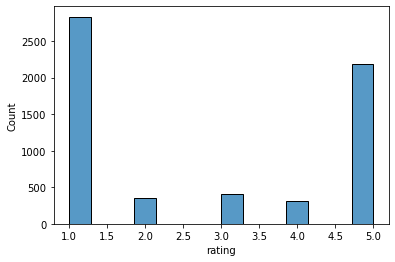

In [183]:
sns.histplot(apple_df["rating"])

In [ ]:


# from google_play_scraper import Sort, reviews_all


# google_reviews = reviews_all(
#     'sa.gov.nic.tawakkalna',
#     sleep_milliseconds=0, # defaults to 0
#     lang='en', # defaults to 'en'
#     country='us', # defaults to 'us'
#     sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
# )


# below for clean google data 

In [ ]:
google_df = pd.DataFrame(np.array(google_reviews),columns=['review'])
google_df = google_df.join(pd.DataFrame(google_df.pop('review').tolist()))
google_df

In [ ]:
googletest.info()

In [ ]:
googletest

In [188]:
google_df=test11

In [74]:
# googletest.content.dropna(inplace=True)
# print(googletest.dropna().sum())

# drop null rows
# data.dropna(inplace=True)
#Exclude empty reviews
test11 = test11[test11.review != '']


In [21]:
# googletest.drop(index=[29512,36061],inplace=True)

In [22]:
googletest.content[googletest.content.isna()]

Series([], Name: content, dtype: object)

In [ ]:
googletest.content

In [5]:
googletest=pd.read_csv('google_df.csv')
googletest.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFDsgU46hLw1b0zJW_ZIhd0WacGYk_l2Opoyu0...,istiak mahmud,https://play-lh.googleusercontent.com/a-/AOh14...,Gd,5,0,3.1.2,2021-09-29 00:10:46,NaN,NaN
1,gp:AOqpTOGgSFl7uWEINgMTOzAbbcfB3yGOoEL_okaEDm0...,Satham Skf,https://play-lh.googleusercontent.com/a-/AOh14...,வணக்கம் சவுதி நண்பர்களே சவூதி 1 டோஸ் தடுப்பூசி...,1,0,3.2.0,2021-09-28 23:58:05,NaN,NaN
2,gp:AOqpTOEOeEmTWXk3Dlt7zYBT1k9DkwqNisX1sR9pIcg...,Ahmed احمد Gadi قاضي,https://play-lh.googleusercontent.com/a-/AOh14...,Okay,4,0,3.2.0,2021-09-28 23:56:37,NaN,NaN
3,gp:AOqpTOFk8RDjMK7th0robV9QjkAhGv70LZrbUzQqRBE...,Sajahan Bd,https://play-lh.googleusercontent.com/a/AATXAJ...,It's very important and very helpful to find t...,5,0,3.1.2,2021-09-28 23:55:44,NaN,NaN
4,gp:AOqpTOHFcu8OE_THUDPhTOLf0f_vp_A7Ld-5F_RtrIM...,spider jaymari,https://play-lh.googleusercontent.com/a-/AOh14...,this app is very useful...in everyday life her...,5,0,3.1.2,2021-09-28 23:51:58,NaN,NaN


In [6]:
googletest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37179 entries, 0 to 37178
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              37179 non-null  object 
 1   userName              37179 non-null  object 
 2   userImage             37179 non-null  object 
 3   content               37177 non-null  object 
 4   score                 37179 non-null  int64  
 5   thumbsUpCount         37179 non-null  int64  
 6   reviewCreatedVersion  32732 non-null  object 
 7   at                    37179 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.8+ MB


In [7]:
googletest.drop(columns=["reviewId","userImage",'replyContent','repliedAt'],inplace=True)

In [ ]:
i

In [ ]:
googletest.content

In [ ]:
googletest

In [79]:
test11

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,review
0,istiak mahmud,Gd,5,0,3.1.2,2021-09-29 00:10:46,Gd
1,Satham Skf,வணக்கம் சவுதி நண்பர்களே சவூதி டோஸ் தடுப்பூசி இ...,1,0,3.2.0,2021-09-28 23:58:05,Hello Saudi friends Saudi dose vaccine india d...
2,Ahmed احمد Gadi قاضي,Okay,4,0,3.2.0,2021-09-28 23:56:37,Okay
3,Sajahan Bd,It is very important and very helpful to find ...,5,0,3.1.2,2021-09-28 23:55:44,It is very important and very helpful to find ...
4,spider jaymari,this app is very useful...in everyday life her...,5,0,3.1.2,2021-09-28 23:51:58,this app is very useful in everyday life here ...
...,...,...,...,...,...,...,...
37173,Ramy Mohamed,"Not working, I can not register and I received...",2,75,1.0.0,2020-04-12 12:33:41,Not working I can not register and I received ...
37174,Ismael Khan,البرنامج لا يعمل مع جهازي .. سامسونج جالاكسي ا...,1,15,1.0.0,2020-04-11 14:26:39,The program does not work with my device Samsu...
37175,Ali Khalid,"I can not even register. Keeps saying ""somethi...",1,14,1.0.0,2020-04-11 00:18:07,I can not even register Keeps saying something...
37176,Abdullateef Addajani,ممتاز وربي يوفقكم، لكن متى راح يشتغل، تعبنا من...,5,2,1.0.0,2020-04-09 17:56:37,Excellent and may God grant you success but wh...


In [ ]:
text11.to

In [69]:
def decontracted(phrase):
    # specific
    
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
test11.review = test11.review.apply(decontracted)

#Removing numbers
def rem_num(phrase):
  return re.sub("\S*\d\S*", "", phrase).strip().replace('  ', ' ')
test11.review = test11.review.apply(rem_num)

#Removing spacial character
def rem_char(phrase):
  return re.sub('[^A-Za-z]+', ' ', phrase).strip().replace('  ', ' ')
test11.review = test11.review.apply(rem_char)

#Removing html tags
def rem_html(phrase):
  return re.sub('[^A-Za-z]+', ' ', phrase)
test11.review =  test11.review.apply(rem_html)

test11

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,review
0,istiak mahmud,Gd,5,0,3.1.2,2021-09-29 00:10:46,Gd
1,Satham Skf,வணக்கம் சவுதி நண்பர்களே சவூதி டோஸ் தடுப்பூசி இ...,1,0,3.2.0,2021-09-28 23:58:05,Hello Saudi friends Saudi dose vaccine india d...
2,Ahmed احمد Gadi قاضي,Okay,4,0,3.2.0,2021-09-28 23:56:37,Okay
3,Sajahan Bd,It is very important and very helpful to find ...,5,0,3.1.2,2021-09-28 23:55:44,It is very important and very helpful to find ...
4,spider jaymari,this app is very useful...in everyday life her...,5,0,3.1.2,2021-09-28 23:51:58,this app is very useful in everyday life here ...


In [77]:
test11

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,review
0,istiak mahmud,Gd,5,0,3.1.2,2021-09-29 00:10:46,Gd
1,Satham Skf,வணக்கம் சவுதி நண்பர்களே சவூதி டோஸ் தடுப்பூசி இ...,1,0,3.2.0,2021-09-28 23:58:05,Hello Saudi friends Saudi dose vaccine india d...
2,Ahmed احمد Gadi قاضي,Okay,4,0,3.2.0,2021-09-28 23:56:37,Okay
3,Sajahan Bd,It is very important and very helpful to find ...,5,0,3.1.2,2021-09-28 23:55:44,It is very important and very helpful to find ...
4,spider jaymari,this app is very useful...in everyday life her...,5,0,3.1.2,2021-09-28 23:51:58,this app is very useful in everyday life here ...
...,...,...,...,...,...,...,...
37173,Ramy Mohamed,"Not working, I can not register and I received...",2,75,1.0.0,2020-04-12 12:33:41,Not working I can not register and I received ...
37174,Ismael Khan,البرنامج لا يعمل مع جهازي .. سامسونج جالاكسي ا...,1,15,1.0.0,2020-04-11 14:26:39,The program does not work with my device Samsu...
37175,Ali Khalid,"I can not even register. Keeps saying ""somethi...",1,14,1.0.0,2020-04-11 00:18:07,I can not even register Keeps saying something...
37176,Abdullateef Addajani,ممتاز وربي يوفقكم، لكن متى راح يشتغل، تعبنا من...,5,2,1.0.0,2020-04-09 17:56:37,Excellent and may God grant you success but wh...


<AxesSubplot:xlabel='score', ylabel='Count'>

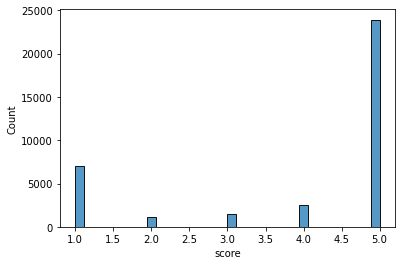

In [78]:
sns.histplot(test11.score)

In [226]:
 test11.to_csv("test11.csv",index=False)

In [66]:
# test11.drop(index=[27884,11555,11528,5032],inplace=True)

In [26]:
for i in googletest.content:
    if i.isdigit() == True:
        print(i)

In [42]:
text11=list_ggg.copy()

In [43]:
text11

['Gd',
 'Hello Saudi friends Saudi dose vaccine india dose immunizer immune status update',
 'Okay',
 'It is very important and very helpful to find the person about.',
 'this app is very useful...in everyday life here in saudi...though u nid to update always but is really good..',
 'The application is excellent and the idea is more than wonderful, and in terms of positive criticism, it has been rated with stars, noting that updates must be planned and reported in advance to avoid problems with the sudden update.',
 'It was amazing  ',
 'happy',
 'Giving breif information which may useful',
 'Very bad application need update every days.',
 'It takes a long time to update',
 'I suggest adding a list of countries to which Saudis are prohibited from traveling because of',
 ' ',
 'Bangladesh',
 'Good app',
 'Excellent',
 ' ',
 'Excellent',
 'Like this app',
 'Very best and easily accessible and working good',
 'Electrical',
 'Sometime not working',
 'Good health care',
 'Good',
 'An excell

In [45]:
googletest["review"]=list_ggg

In [48]:
test11=googletest.copy()
test11

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,review
0,istiak mahmud,Gd,5,0,3.1.2,2021-09-29 00:10:46,Gd
1,Satham Skf,வணக்கம் சவுதி நண்பர்களே சவூதி டோஸ் தடுப்பூசி இ...,1,0,3.2.0,2021-09-28 23:58:05,Hello Saudi friends Saudi dose vaccine india d...
2,Ahmed احمد Gadi قاضي,Okay,4,0,3.2.0,2021-09-28 23:56:37,Okay
3,Sajahan Bd,It is very important and very helpful to find ...,5,0,3.1.2,2021-09-28 23:55:44,It is very important and very helpful to find ...
4,spider jaymari,this app is very useful...in everyday life her...,5,0,3.1.2,2021-09-28 23:51:58,this app is very useful...in everyday life her...
...,...,...,...,...,...,...,...
37174,Ismael Khan,البرنامج لا يعمل مع جهازي .. سامسونج جالاكسي ا...,1,15,1.0.0,2020-04-11 14:26:39,The program does not work with my device.. Sam...
37175,Ali Khalid,"I can not even register. Keeps saying ""somethi...",1,14,1.0.0,2020-04-11 00:18:07,"I can not even register. Keeps saying ""somethi..."
37176,Abdullateef Addajani,ممتاز وربي يوفقكم، لكن متى راح يشتغل، تعبنا من...,5,2,1.0.0,2020-04-09 17:56:37,"Excellent, and may God grant you success, but ..."
37177,Abdulaziz Alamoudi,👍,5,0,1.0.0,2020-04-09 11:18:34,


In [40]:
for i in list_ggg:
    if detect(i) != 'en':
        print(i)

Gd
Hello Saudi friends Saudi dose vaccine india dose immunizer immune status update
Okay
happy


LangDetectException: No features in text.

In [36]:
len(list_ggg)

37177

In [37]:
len(googletest)

37177

In [35]:
list_ggg=[]
for i in googletest.content:
#     try:
        list_ggg.append(detect_and_translate(i,target_lang='en'))
#     except :
#         pass

In [ ]:
len(list_gg)

In [ ]:
for i in google_df.content:
    print(i)

In [ ]:
google_df["at"].sort_values()

In [ ]:
for i in google_df.content:
    print(detect_and_translate(i,target_lang='en'))

In [ ]:
google_df[google_df["content"].str.contains('!!!!')]

In [ ]:
sns.histplot(google_df["score"])

In [ ]:
# translator = Translator()

In [ ]:
# pip install google_trans_new

In [ ]:
#pip install google_trans_new
# from google_trans_new import Tr  
# translator = google_translator()  
# translate_text = translator.translate('สวัสดีจีน',lang_tgt='en')  
# print(translate_text)
#output: Hello china

In [ ]:
# translations = translator.translate("interjection")

In [ ]:
# from googletrans import Translator
# translator = Translator(service_urls=['translate.googleapis.com'])
# translator.translate("Der Himmel ist blau und ich mag Bananen", dest='en')

# above for google, below for concat

In [199]:
google_df.head(3)

,userName,rating,data,review
0,istiak mahmud,5,2021-09-29 00:10:46,Gd
1,Satham Skf,1,2021-09-28 23:58:05,Hello Saudi friends Saudi dose vaccine india d...
2,Ahmed احمد Gadi قاضي,4,2021-09-28 23:56:37,Okay


In [191]:
google_df.drop(columns=['content','thumbsUpCount',"reviewCreatedVersion"],inplace=True)

C:\Users\Fahad-MSi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [228]:
google_df.to_csv("google_df.csv",index=False)

In [203]:
# rating	review	date	userName
google_df.rename(columns={'at': 'date','score':'rating'}, inplace=True)

In [204]:
Data_df = pd.concat([apple_df,google_df ], axis=0,ignore_index=True)

In [227]:
Data_df.to_csv("Data_df.csv",index=False)

In [210]:
Data_df

,rating,review,date,userName
0,4,suggestion,2021-02-05 10:14:14,r980831
1,1,location privacy offline suppprt,2021-08-08 21:11:24,sweatytryhard989
2,5,removal auto selection pfizer approval vaccina...,2021-08-09 10:48:24,Lei Davinci
3,4,good overall,2020-05-07 11:41:27,hadkamal
4,5,login log,2021-09-09 17:56:20,ebuHuda
...,...,...,...,...
42250,2,Not working I can not register and I received ...,2020-04-12 12:33:41,Ramy Mohamed
42251,1,The program does not work with my device Samsu...,2020-04-11 14:26:39,Ismael Khan
42252,1,I can not even register Keeps saying something...,2020-04-11 00:18:07,Ali Khalid
42253,5,Excellent and may God grant you success but wh...,2020-04-09 17:56:37,Abdullateef Addajani


In [208]:
len(Data_df) - len(Data_df.dropna())

0

In [209]:
Data_df.dropna()

,rating,review,date,userName
0,4,suggestion,2021-02-05 10:14:14,r980831
1,1,location privacy offline suppprt,2021-08-08 21:11:24,sweatytryhard989
2,5,removal auto selection pfizer approval vaccina...,2021-08-09 10:48:24,Lei Davinci
3,4,good overall,2020-05-07 11:41:27,hadkamal
4,5,login log,2021-09-09 17:56:20,ebuHuda
...,...,...,...,...
42250,2,Not working I can not register and I received ...,2020-04-12 12:33:41,Ramy Mohamed
42251,1,The program does not work with my device Samsu...,2020-04-11 14:26:39,Ismael Khan
42252,1,I can not even register Keeps saying something...,2020-04-11 00:18:07,Ali Khalid
42253,5,Excellent and may God grant you success but wh...,2020-04-09 17:56:37,Abdullateef Addajani


In [211]:
for i in range(0,len(Data_df)-1):
    if type(Data_df.iloc[i]['review']) != str:
        Data_df.iloc[i]['review'] = str(Data_df.iloc[i]['review'])

In [213]:
Data_df = Data_df[Data_df['rating'] != 3]
Data_df

,rating,review,date,userName
0,4,suggestion,2021-02-05 10:14:14,r980831
1,1,location privacy offline suppprt,2021-08-08 21:11:24,sweatytryhard989
2,5,removal auto selection pfizer approval vaccina...,2021-08-09 10:48:24,Lei Davinci
3,4,good overall,2020-05-07 11:41:27,hadkamal
4,5,login log,2021-09-09 17:56:20,ebuHuda
...,...,...,...,...
42250,2,Not working I can not register and I received ...,2020-04-12 12:33:41,Ramy Mohamed
42251,1,The program does not work with my device Samsu...,2020-04-11 14:26:39,Ismael Khan
42252,1,I can not even register Keeps saying something...,2020-04-11 00:18:07,Ali Khalid
42253,5,Excellent and may God grant you success but wh...,2020-04-09 17:56:37,Abdullateef Addajani


In [214]:
def sentiment(n):
    return 1 if n >= 4 else 0
Data_df['sentiment'] = Data_df['rating'].apply(sentiment)
Data_df.head()

<ipython-input-214-c56f418c159d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_df['sentiment'] = Data_df['rating'].apply(sentiment)


,rating,review,date,userName,sentiment
0,4,suggestion,2021-02-05 10:14:14,r980831,1
1,1,location privacy offline suppprt,2021-08-08 21:11:24,sweatytryhard989,0
2,5,removal auto selection pfizer approval vaccina...,2021-08-09 10:48:24,Lei Davinci,1
3,4,good overall,2020-05-07 11:41:27,hadkamal,1
4,5,login log,2021-09-09 17:56:20,ebuHuda,1


<AxesSubplot:xlabel='sentiment', ylabel='Count'>

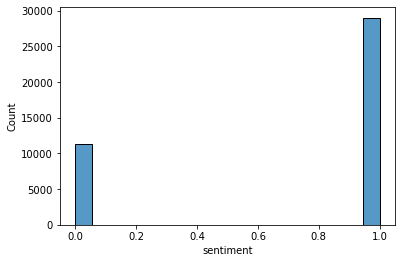

In [215]:
sns.histplot(Data_df.sentiment)

In [217]:
def combined_features(row):
    return row['userName'] + ' '+ row['review']
Data_df['all_features'] = Data_df.apply(combined_features, axis=1)
Data_df.head()

<ipython-input-217-291327b22445>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_df['all_features'] = Data_df.apply(combined_features, axis=1)


,rating,review,date,userName,sentiment,all_features
0,4,suggestion,2021-02-05 10:14:14,r980831,1,r980831 suggestion
1,1,location privacy offline suppprt,2021-08-08 21:11:24,sweatytryhard989,0,sweatytryhard989 location privacy offline suppprt
2,5,removal auto selection pfizer approval vaccina...,2021-08-09 10:48:24,Lei Davinci,1,Lei Davinci removal auto selection pfizer appr...
3,4,good overall,2020-05-07 11:41:27,hadkamal,1,hadkamal good overall
4,5,login log,2021-09-09 17:56:20,ebuHuda,1,ebuHuda login log


In [218]:
X = Data_df['all_features']
y = Data_df['sentiment']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [221]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)

C:\Users\Fahad-MSi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [223]:
y_pred_class = model.predict(X_test_dtm)


In [224]:
y_pred_class

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [225]:
accuracy_score(y_test, y_pred_class)


0.8921704658077304